Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


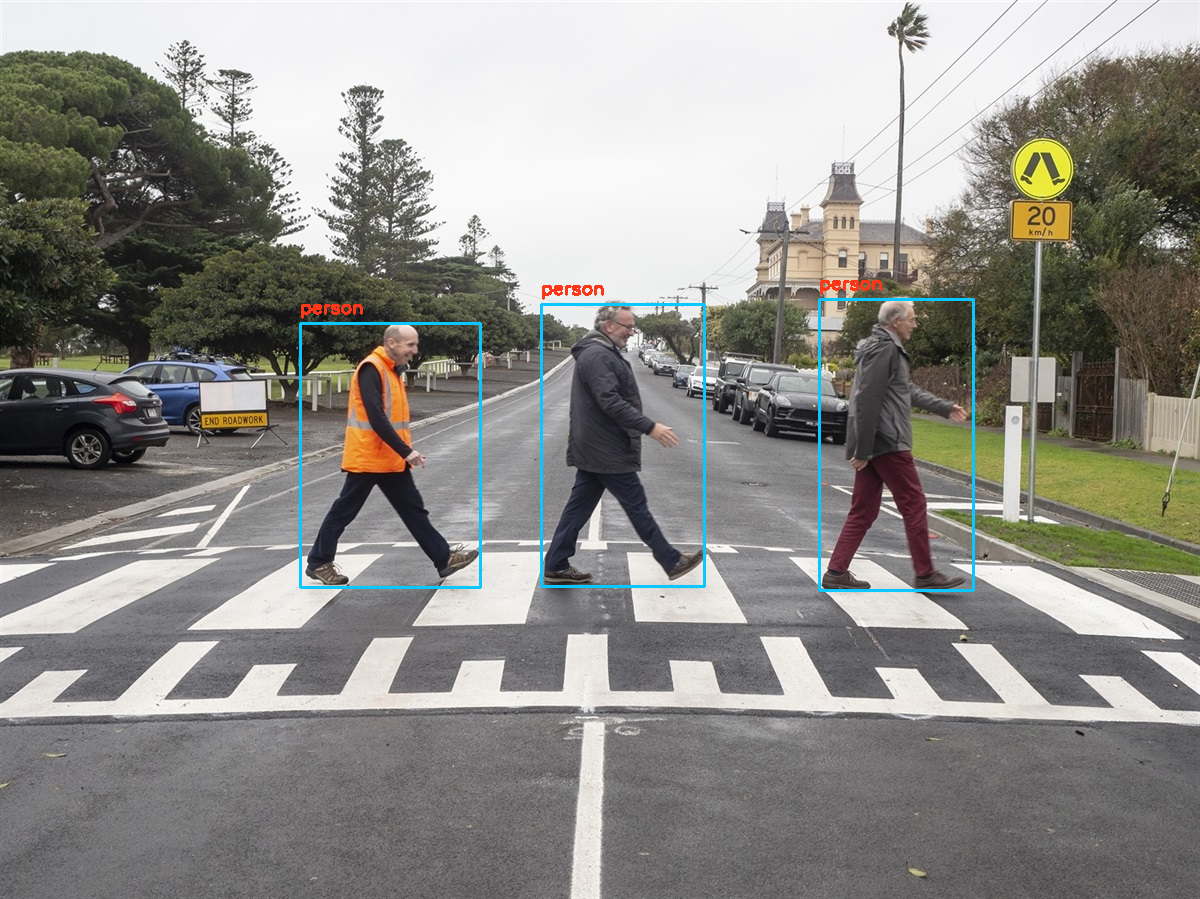

In [5]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
confidence = 0.6
Nms= 0.3
label={}
class_names = []
with open("/content/drive/MyDrive/AI_industry/assignment2/coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/drive/MyDrive/AI_industry/assignment2/gellibrand-street-crossing.jpg")
arc = cv2.dnn.readNet("/content/drive/MyDrive/AI_industry/assignment2/yolov4.weights","/content/drive/MyDrive/AI_industry/assignment2/yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
for (classid, score, box) in zip(classes, scores, boxes):
    if classid==0:
        label == "Person : %.2f" % score
        cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
        cv2.putText(img, 'person', (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)

cv2_imshow(img)